In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("INR.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2021-08-18  74.364502  74.559799  74.195297  74.364502  74.364502       0
1  2021-08-19  74.269798  74.463402  74.269798  74.269798  74.269798       0
2  2021-08-20  74.429298  74.475601  74.324997  74.429298  74.429298       0
3  2021-08-23  74.351303  74.351402  74.042198  74.301498  74.301498       0
4  2021-08-24  74.105904  74.219498  74.055000  74.105904  74.105904       0


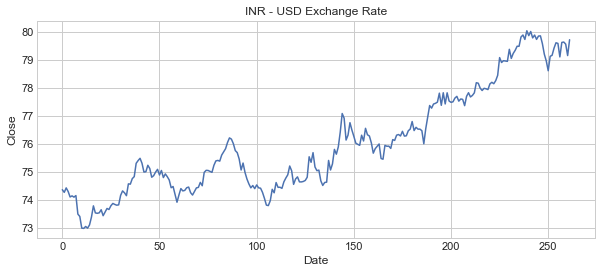

In [2]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.996479  0.996415  0.999760   0.999760     NaN
High       0.996479  1.000000  0.996062  0.996427   0.996427     NaN
Low        0.996415  0.996062  1.000000  0.996512   0.996512     NaN
Close      0.999760  0.996427  0.996512  1.000000   1.000000     NaN
Adj Close  0.999760  0.996427  0.996512  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


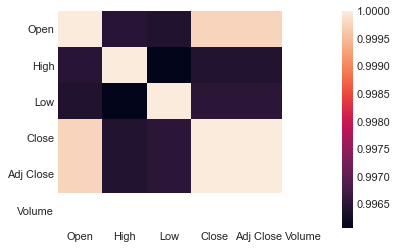

In [3]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [4]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [6]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       79.154900
1       77.977699
2       77.818398
3       75.913200
4       74.191101
